In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from qutip import *
import master_eq

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport master_eq

### General Master Equation

In [302]:
A = 1.2e-2
B = 1.2e-5
C = 1.0e-2
N_max = 600
t_list = np.linspace(0, 8000, 201)

eq = master_eq.MasterEq(A, B, C, N_max)
eq.set_init_state(fock(N_max, 0))

In [303]:
eq.pn_evolve(t_list)

2017-08-11 00:30:21.986559
2017-08-11 00:30:36.271510


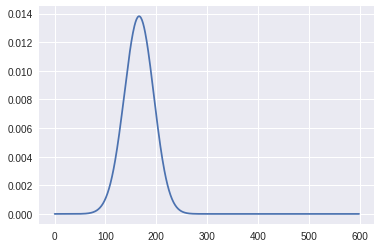

In [304]:
plt.plot(eq.get_pns()[-1])

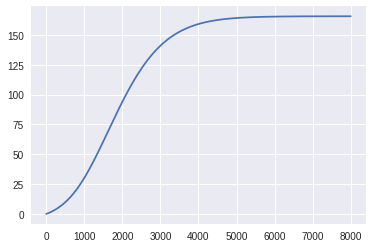

In [305]:
plt.plot(t_list, eq.get_nbars())

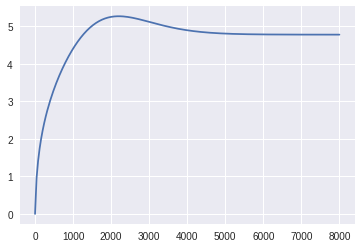

In [306]:
plt.plot(t_list, eq.get_entrs())

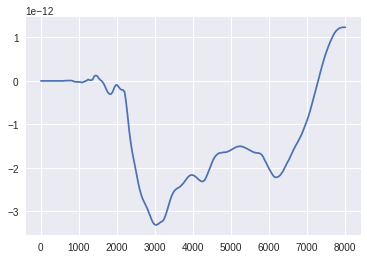

In [307]:
plt.plot(t_list, eq.norm_vs_t - 1)

### Master Equation of Laser via ABC

In [308]:
A = 1.2e-2
B = 1.2e-5
C = 1.0e-2
N_max = 600
t_list = np.linspace(0, 8000, 201)

l = master_eq.LaserABC(A, B, C, N_max)
l.set_init_state(fock(N_max, 0))

In [309]:
l.pn_evolve(t_list)

2017-08-11 00:30:55.030145
2017-08-11 00:31:09.617055


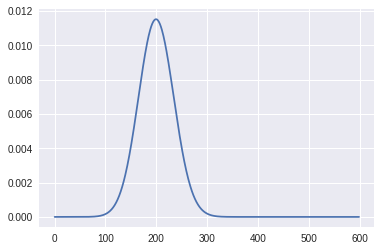

In [310]:
plt.plot(l.get_pns()[-1])

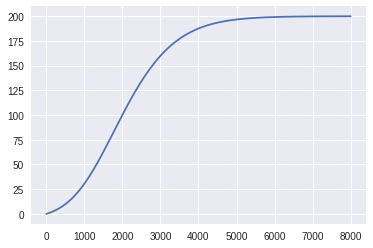

In [311]:
plt.plot(t_list, l.get_nbars())

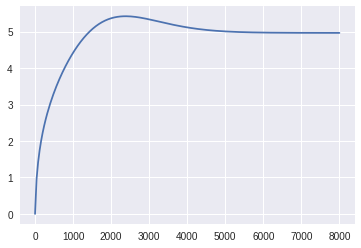

In [312]:
plt.plot(t_list, l.get_entrs())

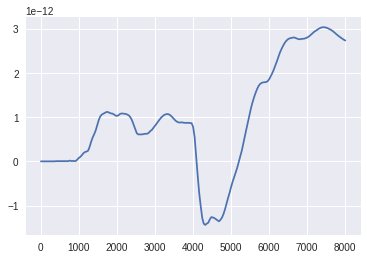

In [313]:
plt.plot(t_list, l.norm_vs_t - 1)

### Master Equation of Laser vis Args

In [327]:
g = 0.001
ra = 0.24
gamma = 0.063246
kappa = 0.0001

N_max = 600
t_list = np.linspace(0, 1200000, 101)

l2 = master_eq.Laser(g, ra, gamma, kappa, N_max)
l2.set_init_state(fock(N_max, 0))

In [329]:
l2.get_abc()

{'A': 0.00011999830454395509, 'B': 1.19996609111865e-07, 'C': 0.0001}

In [244]:
def get_para(alpha, nbar, kappa, g):
    """ calculate parameters given on ratio, nbar, kappa, and g
    """
    gamma = np.sqrt(nbar / (alpha - 1)) * 2 * g
    ra = 2 * kappa * nbar * alpha / (alpha - 1)
    return {'g': g, 'gamma': gamma, 'C': kappa, 'ra': ra,
            'A': 2 * ra * g**2 / gamma**2, 'B': 8 * ra * g**4 / gamma**4}

In [297]:
get_para(1.2, 200, 0.0001, 0.001)

{'A': 0.00011999999999999999,
 'B': 1.1999999999999996e-07,
 'C': 0.0001,
 'g': 0.001,
 'gamma': 0.063245553203367597,
 'ra': 0.24000000000000005}